### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [14]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

I want to see firstly what columns have null data. For substantially large number of null values, we might decide that we can't gain meaningful insight; and therefore might be worthwhile to exclude that data from further analysis.

In [4]:
print(f'Total Rows: {len(data)}')
data.isna().sum()

Total Rows: 12684


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

For some of the columns regarding how many times a person goes to a bar, coffee house, etc. there is a decent number of nulls. But, they still might prove useful, the `cars` column however has a substantial amount of nulls. In fact, 99.15% of the rows have a null `car` column. This might be worth excluding, let's see what the other values are and their counts to see if it's worth keeping.

In [5]:
car_values = data['car'].value_counts(dropna=False)
print(f'Car Values: \n{car_values}')

Car Values: 
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

Yeah, there's no cohesiveness between these columns' values. And probably not helpful to our analysis, so we'll drop it.

In [ ]:
# Rename misspelled column and remove column with missing data
data.rename(columns={'passanger': 'passenger'}, inplace=True)

data_two = data.drop('car', axis=1).copy()
data_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



Proportion of Coupons Accepted (accepted / total observations): 56.84%


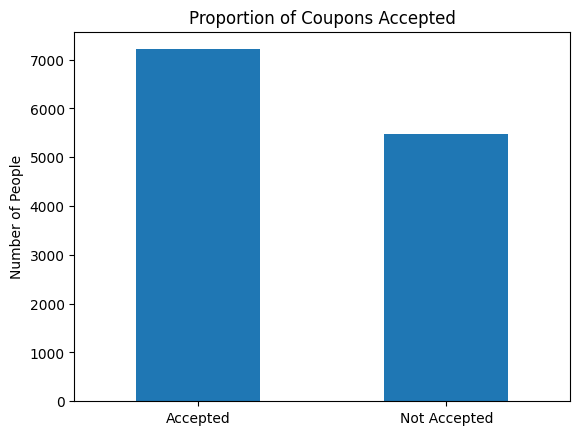

In [25]:

accepted_coupon = data_two['Y'].value_counts()
print(f'Proportion of Coupons Accepted (accepted / total observations): {data_two['Y'].mean() * 100:.2f}%')
accepted_coupon.index = accepted_coupon.index.map({1: 'Accepted', 0: 'Not Accepted'})
accepted_coupon_plot = accepted_coupon.plot(kind='bar', title='Proportion of Coupons Accepted')
plt.xlabel(None)
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [28]:
coupon_values = data_two['coupon'].value_counts()
coupon_values

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

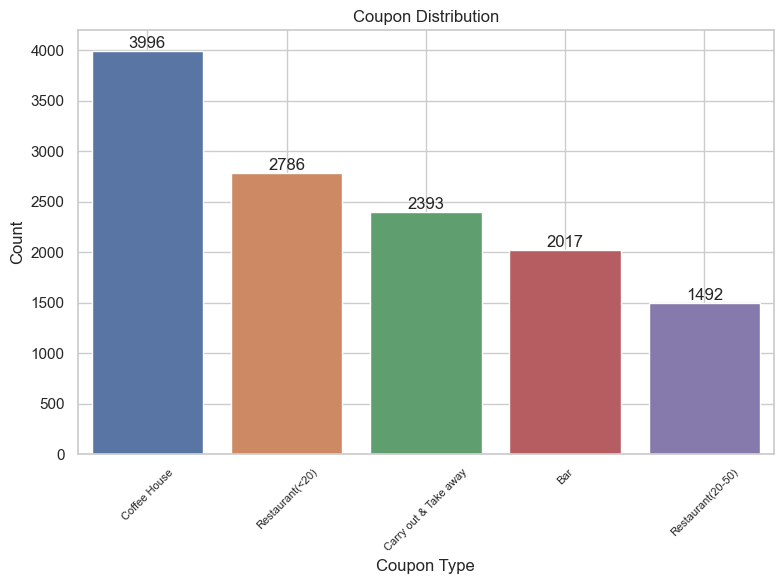

In [79]:
plt.figure(figsize=(8, 6))
coupon_chart = sns.barplot(x=coupon_values.index, y=coupon_values.values, hue=coupon_values.index, legend=False)
# Add the counts of each category to each bar
for container in coupon_chart.containers:
    coupon_chart.bar_label(container)
plt.title('Coupon Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

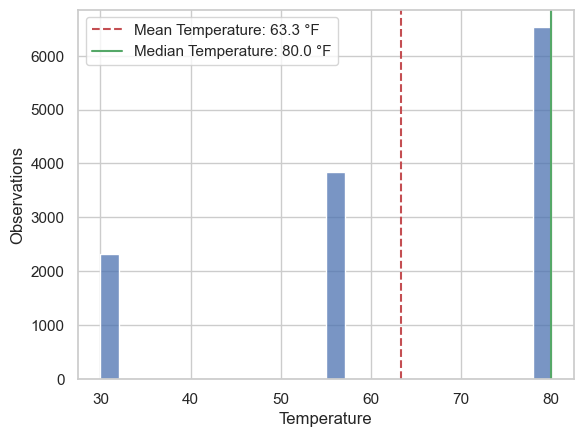

In [89]:
sns.set_style('whitegrid')
temperatures = data_two['temperature'].dropna()
ax = sns.histplot(data=temperatures)
mean_temp = temperatures.mean()
median_temp = temperatures.median()
ax.axvline(mean_temp, color='r', linestyle='--', label=f'Mean Temperature: {mean_temp:.1f} °F')
ax.axvline(median_temp, color='g', linestyle='-', label=f'Median Temperature: {median_temp:.1f} °F')
ax.set_xlabel('Temperature')
ax.set_ylabel('Observations')
ax.legend()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [94]:
bar_df = data_two.loc[data_two['coupon'] == 'Bar']
print(f'Number of Records: {bar_df.shape[0]:,.0f}')
bar_df.head()

Number of Records: 2,017


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Proportion of Bar Coupons Accepted: 41.00%


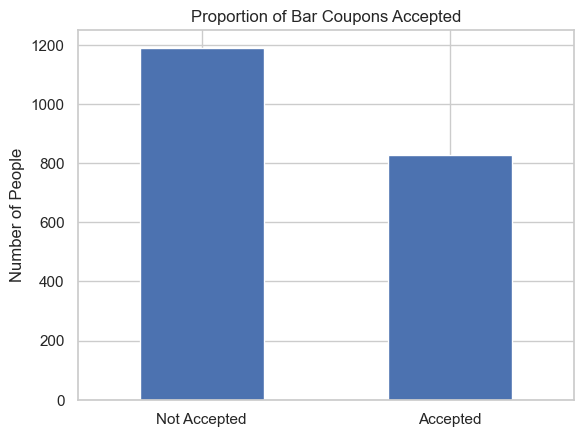

In [86]:
accepted_bar_coupon = bar_df['Y'].value_counts()
print(f'Proportion of Bar Coupons Accepted: {bar_df['Y'].mean() * 100:.2f}%')
accepted_bar_coupon.index = accepted_bar_coupon.index.map({1: 'Accepted', 0: 'Not Accepted'})
accepted_bar_coupon_plot = accepted_bar_coupon.plot(kind='bar', title='Proportion of Bar Coupons Accepted')
plt.xlabel(None)
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Firstly, I want to see what unique values there are for the 'Bar' column to determine what to do next.

In [95]:
bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

So there are null values, going from the earlier counts, there's 107. To compare acceptance rates based on the number of visits, null doesn't give meaningful insight since there is a 'never' value. So counting the nulls might create a bias in the visualization. So we'll remove those.

In [ ]:
bar_df_two = bar_df.dropna(subset=['Bar']).copy()
print()
print(bar_df_two['Bar'].unique())

['never' 'less1' '1~3' 'gt8' '4~8']


In [105]:
three_or_fewer = bar_df_two.loc[bar_df_two['Bar'].isin(['never', 'less1', '1~3'])]
four_or_more = bar_df_two.loc[bar_df_two['Bar'].isin(['4~8', 'gt8'])]

print(three_or_fewer.shape[0])
print(four_or_more.shape[0])

1797
199


Now I need to group rows into two groups: ['never', 'less1', and '1~3'] and ['gt8', '4~8'].

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  